# Assignment

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
# transpose the df
df_2 = df.T
print(df_2.columns)

Int64Index([1992, 1993, 1994, 1995], dtype='int64')


In [3]:
# need to get the mean and std
def CI(series):
    ci = 1.96*(np.std(series)/(len(series)**(.5)))    
    return ci

def CI_range(series):
    ci = 1.96*(np.std(series)/(len(series)**(.5)))
    return np.mean(series) - ci, np.mean(series) + ci

def Stderr(series):
    return np.std(series) / np.sqrt(len(series))
    

        
df_3 = df_2.aggregate([np.mean, Stderr,CI, CI_range], axis=0) # apply function to each column

df_3.head()


,1992,1993,1994,1995
mean,33312.1,41861.9,39493.3,47743.6
Stderr,3320.41,1628.48,2323.1,1154.87
CI,6508.01,3191.82,4553.28,2263.54
CI_range,"(26804.10119651186, 39820.113754576894)","(38670.042552451654, 45053.67652969514)","(34940.02651927516, 44046.58336352261)","(45480.00936287778, 50007.09257565638)"


<IPython.core.display.Javascript object>


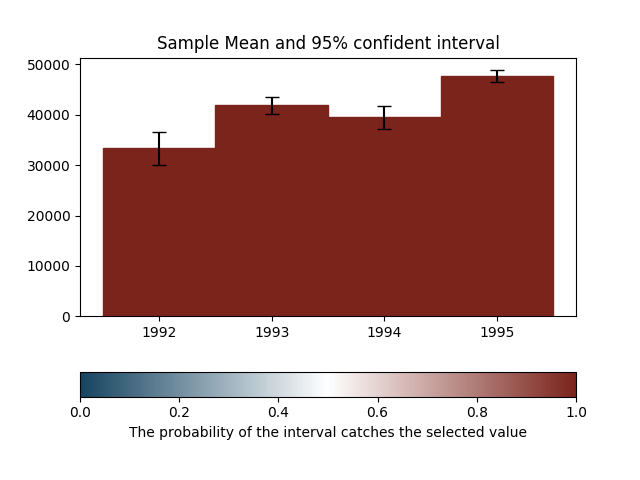

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcol
from matplotlib.widgets import Cursor
from scipy import stats



xlabel = list(df_3.columns)
xloc = np.arange(len(df_3.columns))

# get colorbar
cbar = mcol.LinearSegmentedColormap.from_list("Test", ['#154360', 'white', '#7b241c'])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cpick = cm.ScalarMappable(cmap=cbar, norm=norm)
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal', label='The probability of the interval catches the selected value')

#["#154360", "#F0F3F4", "#85c1e9", "#7b241c"]
ax = plt.subplot(111)
bars = ax.bar(xloc, df_3.loc['mean'], color="lightgrey", width=1)
ax.set_xticks(xloc)
ax.set_xticklabels(xlabel)
ax.errorbar(xloc, df_3.loc['mean'], yerr=df_3.loc['Stderr'], ls='none', ecolor='black', capsize=5)
# lines = ax.axhline(xmin=0, xmax=1, color='grey')  ### use cursor widget instead
cur = Cursor(ax, horizOn = True, vertOn=False, useblit=True, color='grey', lw=2)
ax.set_title("Sample Mean and 95% confident interval")
# ax_y = plt.axes([0.25, 0.95, 0.5, 0.03], facecolor='lightgoldenrodyellow')
# slider_y = Slider(ax_y, "Set Y Value:", valmin=0, valmax = 50000)



class BarPlot:
    def __init__(self, df, ax, bars): # def __init__(self, df, ax, bars, lines)
        self.ax = ax
        self.bars = bars
        self.df = df
        
    def on_motion(self, event):
        x = event.xdata
        y = event.ydata

        if x is not None and y is not None:
             # self.line()
            self.update(y)
            ax.figure.canvas.draw_idle()
        elif x is None and y is None:
            self.lines.set_data([0,0], [0,0])


        
    def update(self, y):
        means = np.asarray(self.df.loc['mean'])
        CI = np.asarray(self.df.loc['CI_range'])
        stderr = np.asarray(self.df.loc['Stderr'])
    
        for i in range(len(means)):
            # calculate z score to means
            zscore = (y - means[i]) / stderr[i]
            # pvalue smallest, higher probability in the range
            prob = 1-stats.norm.cdf(zscore)
            self.bars[i].set_color(cpick.to_rgba(prob))



        
    def connect(self):
        self.ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)
        #slider_y.on_changed(self.update_slider)
            
            

p = BarPlot(df_3, ax, bars)
p.connect()


        



### use span selector

<IPython.core.display.Javascript object>


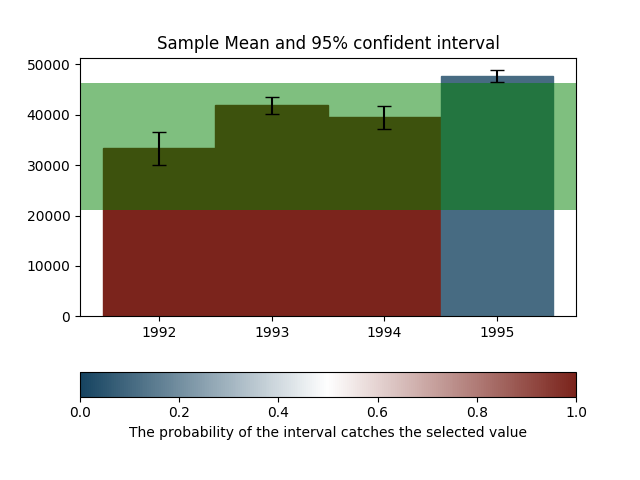

In [67]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcol
from matplotlib.widgets import SpanSelector
from scipy import stats



xlabel = list(df_3.columns)
xloc = np.arange(len(df_3.columns))

# get colorbar
cbar = mcol.LinearSegmentedColormap.from_list("Test", ['#154360', 'white', '#7b241c'])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cpick = cm.ScalarMappable(cmap=cbar, norm=norm)
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal', label='The probability of the interval catches the selected value')

#["#154360", "#F0F3F4", "#85c1e9", "#7b241c"]
ax = plt.subplot(111)
bars = ax.bar(xloc, df_3.loc['mean'], color="lightgrey", width=1)
ax.set_xticks(xloc)
ax.set_xticklabels(xlabel)
ax.errorbar(xloc, df_3.loc['mean'], yerr=df_3.loc['Stderr'], ls='none', ecolor='black', capsize=5)
# lines = ax.axhline(xmin=0, xmax=1, color='grey')  ### use cursor widget instead
#cur = Cursor(ax, horizOn = True, vertOn=False, useblit=True, color='grey', lw=2)
ax.set_title("Sample Mean and 95% confident interval")
# ax_y = plt.axes([0.25, 0.95, 0.5, 0.03], facecolor='lightgoldenrodyellow')
# slider_y = Slider(ax_y, "Set Y Value:", valmin=0, valmax = 50000)

def betweenZs(ymin, ymax, mean, stderr):
    # z1 and z2 cdf
    # the pvalue and the probability small pvalue, higher probability
    z1 = (ymin - mean) / stderr
    prob1 = 1- stats.norm.cdf(z1)
    z2 = (ymax - mean) / stderr
    prob2 = 1 - stats.norm.cdf(z2)
    
    p = None
    if z2 > z1:
        p = prob1 - prob2
    elif z1 > z2:
        p = prob2 - prob1
        
    return p
    


class BarPlot:
    def __init__(self, df, ax, bars): # def __init__(self, df, ax, bars, lines)
        self.ax = ax
        self.bars = bars
        self.df = df
        
    def _onSelect(self, ymin, ymax):
        self.update(ymin, ymax)
    
    def Selector(self):
        
        span = SpanSelector(self.ax, self._onSelect, 'vertical', 
                            useblit=True, rectprops=dict(alpha=0.5, facecolor='green'), 
                            span_stays=True)
        return span
    
        
    def update(self, ymin, ymax):

        means = np.asarray(self.df.loc['mean'])
        CI = np.asarray(self.df.loc['CI_range'])
        stderr = np.asarray(self.df.loc['Stderr'])
        Ymin = ymin
        Ymax = ymax
    
        for i in range(len(means)):
            # calculate z score to means
            p = betweenZs(Ymin, Ymax, means[i], stderr[i])
            self.bars[i].set_color(cpick.to_rgba(p))
            


p = BarPlot(df_3, ax, bars)
p.Selector()



{'ymin': 16151.292787576986, 'ymax': 36591.78455294469}